In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
data = pd.read_csv('ml_lca_data_variable.csv')

# extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
         'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day',
         'PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day']]
y = data['CO2_ based on LCA calculation (Million Metric Tons)']

# add a constant term to the independent variables
X = sm.add_constant(X)

# fit the linear regression model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())


                                             OLS Regression Results                                            
Dep. Variable:     CO2_ based on LCA calculation (Million Metric Tons)   R-squared:                       1.000
Model:                                                             OLS   Adj. R-squared:                  1.000
Method:                                                  Least Squares   F-statistic:                 7.177e+06
Date:                                                 Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                                         12:35:40   Log-Likelihood:                -9.8733
No. Observations:                                                  600   AIC:                             33.75
Df Residuals:                                                      593   BIC:                             64.53
Df Model:                                                            6                                  

Coefficients: [0.00000000e+00 2.36413484e-03 4.94282726e-02 3.56645246e-04
 6.04614034e-04 6.72320351e-04 2.83708394e-05]
Intercept: 1.332188060504734
R² (Training): 0.9999857116215131
###########################################################################
R²: 1.00
Mean Absolute Error: 0.19
Mean Squared Error: 0.06
Root Mean Squared Error: 0.24


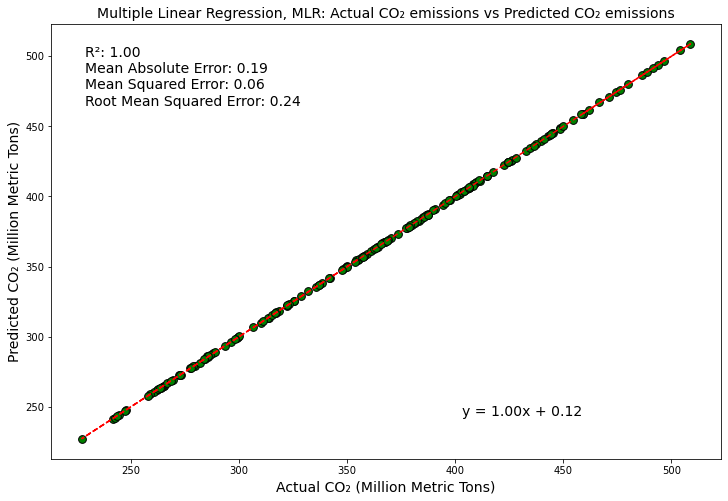

In [3]:

from sklearn.utils import shuffle

# Shuffle data
X, y = shuffle(X, y, random_state = 42)
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Check the shape of the training and testing sets
#print('X_train shape:', X_train.shape)
#print('y_train shape:', y_train.shape)
#print('X_test shape:', X_test.shape)
#print('y_test shape:', y_test.shape)

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)


# Make predictions on the training data
y_pred_train = reg.predict(X_train)

# Calculate the R-squared score for the training data
r2_train = r2_score(y_train, y_pred_train)
print("R² (Training):", r2_train)


print('###########################################################################')


# Use the predict method to make predictions on the testing data
y_pred = reg.predict(X_test)



# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print("R²:", format(r2, ".2f"))
print("Mean Absolute Error:", format(mae, ".2f"))
print("Mean Squared Error:", format(mse, ".2f"))
print("Root Mean Squared Error:", format(rmse, ".2f"))


# Calculate statistical parameters
correlation = np.corrcoef(y_test, y_pred)[0, 1]
r_squared = np.square(correlation)


# Perform linear regression to get the line equation
slope, intercept = np.polyfit(y_test, y_pred, 1)

# Add the equation as text on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'



# Fit a linear regression line
trendline = np.polyfit(y_test, y_pred, 1)
trendline_fn = np.poly1d(trendline)

plt.figure(figsize=(12, 8))  # Specify the width and height in inches

# Plot Actual vs Predicted values with trend line
plt.scatter(y_test, y_pred, color='green', edgecolor='black', s = 60)
plt.plot(y_test, trendline_fn(y_test), color='red', linestyle='--')
plt.xlabel('Actual CO₂ (Million Metric Tons)', fontsize=14)
plt.ylabel('Predicted CO₂ (Million Metric Tons)', fontsize=14)
plt.title('Multiple Linear Regression, MLR: Actual CO₂ emissions vs Predicted CO₂ emissions', fontsize=14)


# Annotate statistical parameters on the plot
#textstr = f'Correlation coefficient: {correlation:.2f}\nR-squared: {r_squared:.2f}'
textstr = f'R²: {format(r2, ".2f")}\nMean Absolute Error: {format(mae, ".2f")}\nMean Squared Error: {format(mse, ".2f")}\nRoot Mean Squared Error: {format(rmse, ".2f")}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', fontsize=14)
plt.text(0.6, 0.2, equation, transform=plt.gcf().transFigure, fontsize=14)
plt.savefig('Multiple Linear Regression Actual CO₂ emissions vs Predicted CO₂ emissions.jpg')
plt.show()
